<p style="text-align: center">
<img src="../../assets/images/dtlogo.png" alt="Duckietown" width="50%">
</p>

A *state* describes the condition of our robot at a specific time. This may include information about where the robot is, or other factors related to the environment that may affect the robot. When we develop a robotics algorithm, we are responsible to decide the information that we wish to include in the state. In other words, the definition of state depends on the task that we are trying to solve. Ideally, we want a state to exhibit the following properties:

1. Markov property: future state is independent of the past given the present:


$$x_{t+1} = f(x_t, x_{t-1}, \dots, x_0; u_t, \dots, u_0) = f(x_t; u_t)$$


2. A minimally sufficient statistic for the task (i.e., it contains only the information that we need to solve the task)
3. Permits efficient computation
4. Generalizable

An example of a state representation that is often used in robotics is the *pose*. A *pose* represents the location of the robot in the world as well as its orientation (i.e., what direction is the robot facing towards). Since we live in a 3-dimensional (3D) world, we represent the location of the robot as its $(x,y,z)$ coordinate in the world. We can represent orientation in terms of its roll, pitch, and yaw angles (also known as Euler angle representation). For example, the yaw angle $\theta_{yaw}$ will be the angle difference between the longitudinal axis of the robot from the reference frame.

<figure>
  <div style="text-align:center;">
  <img src="../../assets/images/representations/roll_pitch_yaw.png">
  <p>Illustration of roll, pitch, and yaw (source: https://en.wikipedia.org/wiki/Aircraft_principal_axes).</p>
  </div>
</figure>

Note that the location and the orientation of the robot can be defined either in the global coordinate frame (i.e., relative to where the origin is) or relative to any other coordinate frames. Combining location and orientation, we can write the pose $q$ in a vector/matrix form:

$$
q = 
\begin{bmatrix}
x & y & z & \theta_{roll} & \theta_{pitch} & \theta_{yaw}
\end{bmatrix}
$$

The pose $q$ can also be represented in the form of a homogeneous transformation matrix, sinces poses are members of the Matrix Lie Group called the **S**pecial **E**uclidean group $SE(3)$:

$$
SE(3) = \{T = 
\begin{bmatrix}
R & r \\
0^T & 1
\end{bmatrix}
\in \mathrm{R}^{4 \times 4} | R \in SO(3), r \in \mathrm{R}^{3}
\},
$$

where $R$ denotes the rotation matrix, and $r$ denotes the translation component. This matrix $T$ also has a nice property where 

$$
T^{-1} = 
\begin{bmatrix}
R^T & -R^Tr \\
0 & 1
\end{bmatrix}
$$

One of the reasons to represent the pose in this form is because it allows us to conveniently move between frames (see later in this activity). 

Although we have been discussing the pose in $SE(3)$, since we are using a mobile robot and we assume the world is flat, we can simplify the pose of our robot to only its $(x,y)$ coordinate and its yaw (or orientation) angle $\theta$. This is because, in addition to the assumption that the robot is always located at a constant elevation, we can also safely assume roll and pitch angles to always be constant since the robot always touches the ground. So in this case, the pose is simply $
q = 
\begin{bmatrix}
x & y & \theta
\end{bmatrix}
$, which we can also write in $SE(2)$:

$$
SE(2) = \{T = 
\begin{bmatrix}
R & r \\
0^T & 1
\end{bmatrix}
\in \mathrm{R}^{3 \times 3} | R \in SO(2), r \in \mathrm{R}^{2}
\},
$$

where

$$
\small
R = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix}
\ \ \ \
r = 
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
$$

So, we have:

$$
T = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & x \\
\sin(\theta) & \cos(\theta) & y \\
0 & 0 & 1
\end{bmatrix}
$$

Let's first make sure that we understand how to represent a pose by doing the exercise below.

**EXAMPLE: representing pose in $SE(n)$**

<figure>
  <div style="text-align:center;">
  <img src="../../assets/images/representations/pose_exercise.png">
  </div>
</figure>

**Question:**

The figure above illustrates the location of the robot (the orange dot) and its orientation, where the angle is measured from the $x$-axis (assume the angle to have a positive measure if the rotation is counterclockwise). How do we write the pose in $SE(2)$?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frame(T, ax=None, xlim=(0,3), ylim=(0,3), label=None):
    # If no axis provided, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
        
        # Set plot limits
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
        ax.axvline(0, color='grey',linewidth=0.8)
        ax.axhline(0, color='grey',linewidth=0.8)
        ax.grid(True)
        ax.set_aspect('equal', adjustable='box')

    origin_homog = np.array([0, 0, 1])
    x_axis_homog = np.array([1, 0, 1])
    y_axis_homog = np.array([0, 1, 1])

    origin_transformed = T @ origin_homog
    x_axis_transformed = T @ x_axis_homog
    y_axis_transformed = T @ y_axis_homog

    ax.scatter(*origin_transformed[:2], c='red', marker='o', s=100)
    
    ax.quiver(*origin_transformed[:2], *(x_axis_transformed[:2] - origin_transformed[:2]), angles='xy', scale_units='xy', scale=1, color='red', label=label)
    ax.quiver(*origin_transformed[:2], *(y_axis_transformed[:2] - origin_transformed[:2]), angles='xy', scale_units='xy', scale=1, color='blue')
    
    return ax

def plot_points(points, ax=None, color='purple', marker='x', label=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
        
        ax.axvline(0, color='grey',linewidth=0.8)
        ax.axhline(0, color='grey',linewidth=0.8)
        ax.grid(True)
        ax.set_aspect('equal', adjustable='box')
    
    # Convert points to 2D if they are in homogeneous coordinates
    if points.shape[-1] == 3:
        points = points[:, :2] / points[:, 2:3]

    ax.scatter(points[:, 0], points[:, 1], c=color, marker=marker, label=label)
    
    return ax


In [3]:
# Type your answer here
# Tip 1: always express your angles in radians!
# Tip 2: you can go from degrees to radians through the np.deg2rad() function

theta = np.deg2rad(60)

p = np.array([
    [np.cos(theta), -np.sin(theta), 2],
    [np.sin(theta), np.cos(theta), 3],
    [0, 0, 1]
])

print(theta)
print(p)

1.0471975511965976
[[ 0.5       -0.8660254  2.       ]
 [ 0.8660254  0.5        3.       ]
 [ 0.         0.         1.       ]]


(You can find the solutions to this and other questions in the [solutions file](../01-Representations/solutions_pose_representation.ipynb) in this folder. Give it a honest shot yourself before peeking!) 

# II: Moving between frames

It is often useful to convert a pose from one frame to another one, since we may have multiple coordinate frames used in the description of the same problem. Common examples are robot pose with respect to robot or world frame, or pose of an obtacle with respect to the sensor that perceives it or the robot frame. 

As mentioned in the previous section, representing the pose in $SE(n)$ allows us to conveniently move between frames. We can do this by multiplying these transformation matrices together. For example, consider two different poses $a$ and $b$. If we know the pose $a$ in the origin frame $o$ (i.e., $p^o_a$) and the pose $b$ in the frame of $a$ (i.e., $p^a_b$), we can then compute the pose $b$ relative to the origin frame $o$ using the following relation:

$$p^o_b = p^o_a \cdot p^a_b,$$

where $p^o_b$, $p^o_a$, and $p^a_b$ are represented in $SE(n)$. Similarly, if we are given $p^a_o$ and $p^o_b$, we can compute $p^a_b$ via:

$$p^a_b = p^a_o \cdot p^o_b$$

Generally, we can combine these transformations together like the following:

$$p^a_f = p^a_b \cdot p^b_c \cdot p^c_d \cdot p^d_e \cdot p^e_f$$

In addition, another handy relation to know is that $p^a_b = (p^b_a)^{-1}$. 

Let's now take a look at some examples.

**EXAMPLE: moving between frames (from robot frame to map frame)**

Your Duckiebot is on a critical recognition mission: identify and place road obstacles on the map. 

During its mission, your Duckiebot has GPS support, and it knows its own position in the global (map) frame. It encounters its first obstacle at position $x = 2$ m and $y = 0.4$ m, and orientation $\theta$ = 110 degrees. The obstacle itself is at 30cm at 50 degrees (counter-clockwise) from the Duckiebot. Where is the location of the obstacle in the map (i.e., global) frame?

<figure>
  <div style="text-align:center;">
  <img src="../../assets/images/representations/moving_frame_exercise_1.png">
  <p>The orange and blue dots represent the robot and the obstacle, respectively. Determine the position of the blue dot in the global frame given the pose of the Duckiebot in the global from and that of the obstacle with respect to the Duckiebot's frame.</p>
  </div>
</figure>

<!-- We denote our origin frame as $o$, ... as $a$, and ... as $b$. -->

<!-- Compute $p^o_a$ and $p^b_a$, and use them to compute $p^a_b$.  -->

In [4]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Run this cell to initialize the problem
# Tip: be consistent with your units - meters and radians are great choices
# Fact: humans understand degrees better than radians. To avoid confusion, input and output degrees, but do calculations in radians

duckie_pos_g = np.array([2, 0.4])   # Position of Duckiebot in map/global frame (in meters)
duckie_or_g = 110                   # Orientation of Duckiebot in map/global frame (in degrees)
obstacle_dist_to_duckie = 0.3       # Obstacle distance to the Duckiebot
obstacle_angle = 50                 # Obstacle angle with respect to Duckiebot (in degrees)

[1.718 0.503]


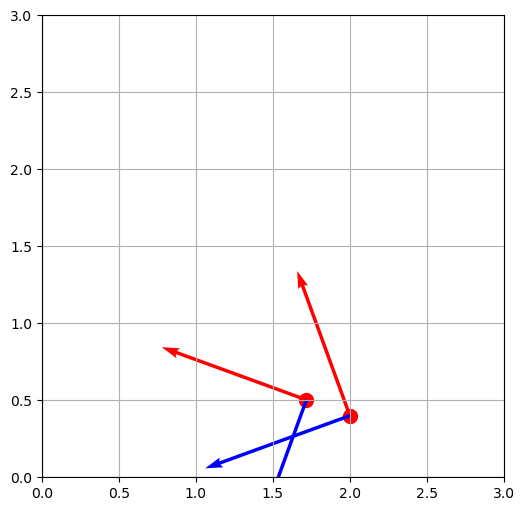

In [5]:
# Let's find the answer!

def get_matrix(angle, position):
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([
        [c, -s, position[0]],
        [s, c, position[1]],
        [0,0,1]
    ])

origin_to_duck = get_matrix(np.deg2rad(duckie_or_g), duckie_pos_g)

obstacle_position_from_duck = np.array([
        np.sin(np.deg2rad(obstacle_angle)),
        np.cos(np.deg2rad(obstacle_angle))
    ])

# Step 3. Transformation matrix from Duckiebot (a) to obstacle (b)
c = np.cos(np.deg2rad(obstacle_angle))
s = np.sin(np.deg2rad(obstacle_angle))
duck_to_obstacle = np.array([
    [c, -s, c*obstacle_dist_to_duckie],
    [s, c,  s*obstacle_dist_to_duckie],
    [0,0,1]
])

# Step 4. Use the above to compute the transformation from origin (o) to obstacle (b)

origin_to_obstacle = origin_to_duck @ duck_to_obstacle

obstacle_position = (origin_to_obstacle @ np.array([0,0,1]))[:2]
 
print(obstacle_position)

ax = plot_frame(origin_to_duck)
#plot_frame(origin_to_obstacle, ax=ax)
plot_frame(origin_to_obstacle, ax=ax)
#plot_frame(translate_sanity, ax=ax)
plt.show()

Correct result: [1.71809221 0.50260604]

**EXAMPLE: moving between frames (from global frame to robot frame)**

A very concerned duckiecitizen reaches out to you: 

"The sky is falling on our heads!" 

A sizeable fragment of the citizen neighbour's roof fell on the road. You are told it is positioned at $x = 4$ m and $y = -1$ m (in the global reference frame).

This is valuable information, but before making it official by adding it to the map, it needs to be verified. You have a nearby Duckiebot, at $x = 3.5$ m, $y = -1.2$ m, oriented at $\theta = 45$ degrees, that will be tasked to reach the roof fragment. 

What are the coordinates of the obstacle described by the concerned citizen with respect to the Duckiebot's reference frame?

<figure>
  <div style="text-align:center;">
  <img src="../../assets/images/representations/moving_frame_exercise_2.png">
  <p>The orange and blue dots represent the robot and the obstacle, respectively. Determine the position of the blue dot in the robot frame.</p>
  </div>
</figure>

In [6]:
### Run this cell to initialize the problem
# Tip: remember to be consistent with your units

duckie_pos_g = np.array([3.5, -1.2])   # Position of Duckiebot in global frame (meters)
duckie_or_g = 45                       # Orientation of Duckiebot in global frame (degrees)
obstacle_pos_g = np.array([4, -1])     # Position of obstacle in global frame (meters)

In [8]:
# Let's send the Duckiebot to the correct place!

# Convert degrees to radians

# Write the transformation matrix from origin (o) to the duckie (a)
origin_to_duck = get_matrix(np.deg2rad(duckie_or_g), duckie_pos_g)

# Write the transformation matrix from origin (o) to the obstacle (b)
origin_to_obstacle = get_matrix(0, obstacle_pos_g)

# Leverage the known properties of transformation matrices and basics of linear algebra to find your answer
duck_to_origin = np.linalg.inv(origin_to_duck) # could do this better since we know it's homogenous
duck_to_obstacle = duck_to_origin @ origin_to_obstacle

# Extract the obstacle position from the transformation matrix
obstacle_position_from_duck = (duck_to_obstacle @ np.array([0,0,1]))[:2]

print(obstacle_position_from_duck)

[ 0.495 -0.212]


Correct result: [ 0.49497475 -0.21213203]

You can now proceed to the [wheel calibration tutorial](../02-Wheel-Calibration/wheels_calibration.ipynb). 

_Credit: [Rey Reza Wiyatno](https://github.com/rrwiyatn)_